# **Importing Modules**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

import pickle 
from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from keras.models import Sequential
from keras.layers import Dense

In [2]:
from scikeras.wrappers import KerasRegressor

# **Importing Datasets**

In [3]:
#data = pd.read_csv('/content/drive/MyDrive/walmart-recruiting-store-sales-forecasting/train.csv')
#stores = pd.read_csv('/content/drive/MyDrive/walmart-recruiting-store-sales-forecasting/stores.csv')
#features = pd.read_csv('/content/drive/MyDrive/walmart-recruiting-store-sales-forecasting/features.csv')

data = pd.read_csv('../data/train.csv')
stores = pd.read_csv('../data/stores.csv')
features = pd.read_csv('../data/features.csv')

**Training Dataset**

In [4]:
data.shape

(421570, 5)

In [5]:
data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


**Dataset containing info of Stores**

In [7]:
stores.shape

(45, 3)

In [8]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [9]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


**Dataset containing additional data of Stores**

In [10]:
features.shape

(8190, 12)

In [11]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [12]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# **Handling missing values of features dataset**

In [13]:
features["CPI"].fillna(features["CPI"].median(),inplace=True)
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)

In [14]:
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [15]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# **Merging Training Dataset and merged stores-features Dataset**

In [16]:
data = pd.merge(data,stores,on='Store',how='left')

In [17]:
data = pd.merge(data,features,on=['Store','Date'],how='left')

In [18]:
data['Date'] = pd.to_datetime(data['Date'])

In [19]:
data.sort_values(by=['Date'],inplace=True)

In [20]:
data.set_index(data.Date, inplace=True)

In [21]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

True

In [22]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

In [23]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


# **Splitting Date Column**

In [24]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week.astype(int)


In [25]:
data.tail(10)

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2012-10-26,19,27,2012-10-26,3177.65,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False,2012,10,43
2012-10-26,3,74,2012-10-26,3370.19,B,37392,74.66,3.506,370.99,6.35,4.00,5.94,180.07,226.987364,6.034,False,2012,10,43
2012-10-26,40,90,2012-10-26,61155.87,A,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145,False,2012,10,43
2012-10-26,19,28,2012-10-26,1837.59,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False,2012,10,43
2012-10-26,19,29,2012-10-26,5988.33,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False,2012,10,43
2012-10-26,40,87,2012-10-26,24638.96,A,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145,False,2012,10,43
2012-10-26,19,30,2012-10-26,3740.12,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False,2012,10,43
2012-10-26,19,31,2012-10-26,3128.17,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False,2012,10,43
2012-10-26,19,33,2012-10-26,5740.14,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False,2012,10,43


# **Outlier Detection and Abnormalities**

**Outliers**

In [26]:
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [27]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

In [28]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,...,6.299,False,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095


In [29]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [30]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [31]:
data.shape

(421533, 20)

In [32]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape

(375438, 20)

In [33]:
data=data[data['Weekly_Sales']>=0]

In [34]:
data.shape

(374247, 20)

In [35]:
data['IsHoliday'] = data['IsHoliday'].astype('int')

In [36]:
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.480,9854.349032,0.00
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,766.93,-9.92,372.655556,371.050,290.954675,0.00
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,2512.14,110.56,876.629441,824.040,307.436056,0.00
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,11990.43,7414.43,9188.915105,9161.970,756.223236,0.00
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,29166.26,4791.74,8607.050490,7571.600,3874.176095,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2,26,2012-10-26,9258.88,A,202307,69.79,3.506,223.078337,6.170,0,2012,10,43,19679.04,4179.99,9347.725105,8762.990,2825.107609,9678.80
2012-10-26,38,23,2012-10-26,53.12,C,39690,65.95,4.301,131.193097,10.199,0,2012,10,43,289.78,3.50,37.848679,31.365,34.065601,502.88
2012-10-26,27,6,2012-10-26,5339.65,A,204184,58.99,4.071,142.762411,8.000,0,2012,10,43,41005.33,2524.01,7730.729091,6798.780,5178.928257,10969.27


In [37]:
data.to_csv('../data/preprocessed_walmart_dataset.csv')

# **Data Visuallizations**

**Average Monthly Sales**

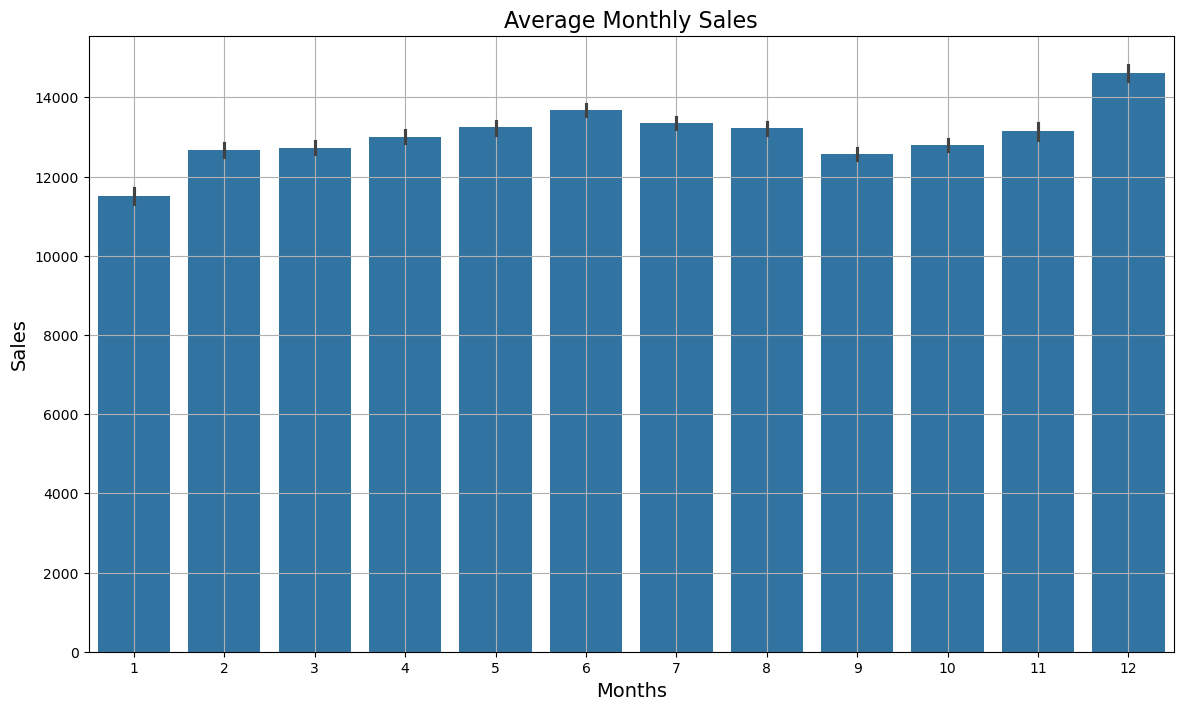

In [38]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

**Monthly Sales for Each Year**

In [39]:
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.365986e+08,1.369976e+08,1.753251e+08,1.422677e+08,1.455770e+08,1.776954e+08,1.426176e+08,1.344151e+08,1.687452e+08,1.440445e+08,1.927286e+08
2011,1.170809e+08,1.320987e+08,1.341586e+08,1.710181e+08,1.382097e+08,1.441182e+08,1.762046e+08,1.398143e+08,1.668033e+08,1.375280e+08,1.034907e+08,1.597524e+08
2012,1.172222e+08,8.915290e+07,1.734250e+08,1.479222e+08,1.512280e+08,1.902330e+08,1.458221e+08,1.636039e+08,1.432228e+08,1.480537e+08,NaN,NaN


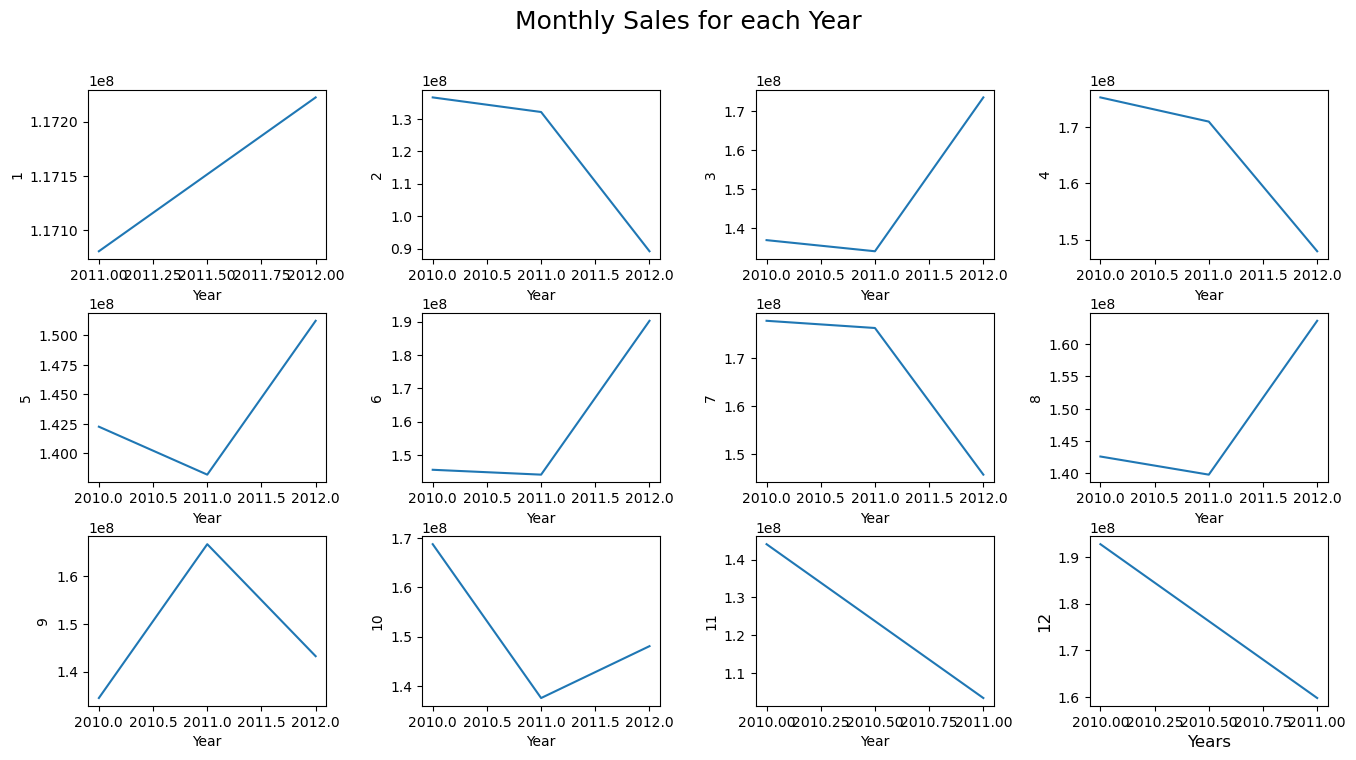

In [40]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.show()

**Average Weekly Sales Store wise**

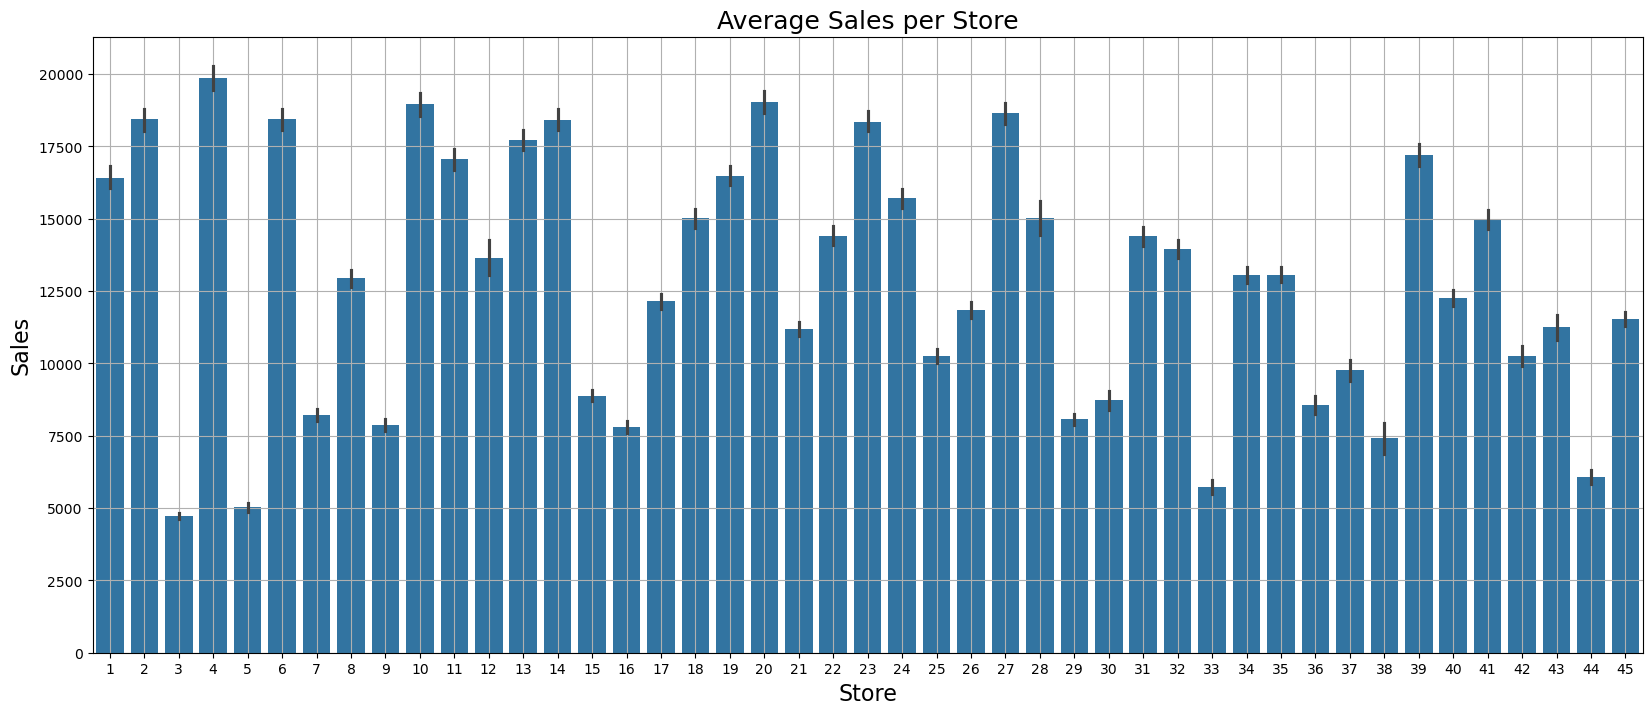

In [41]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

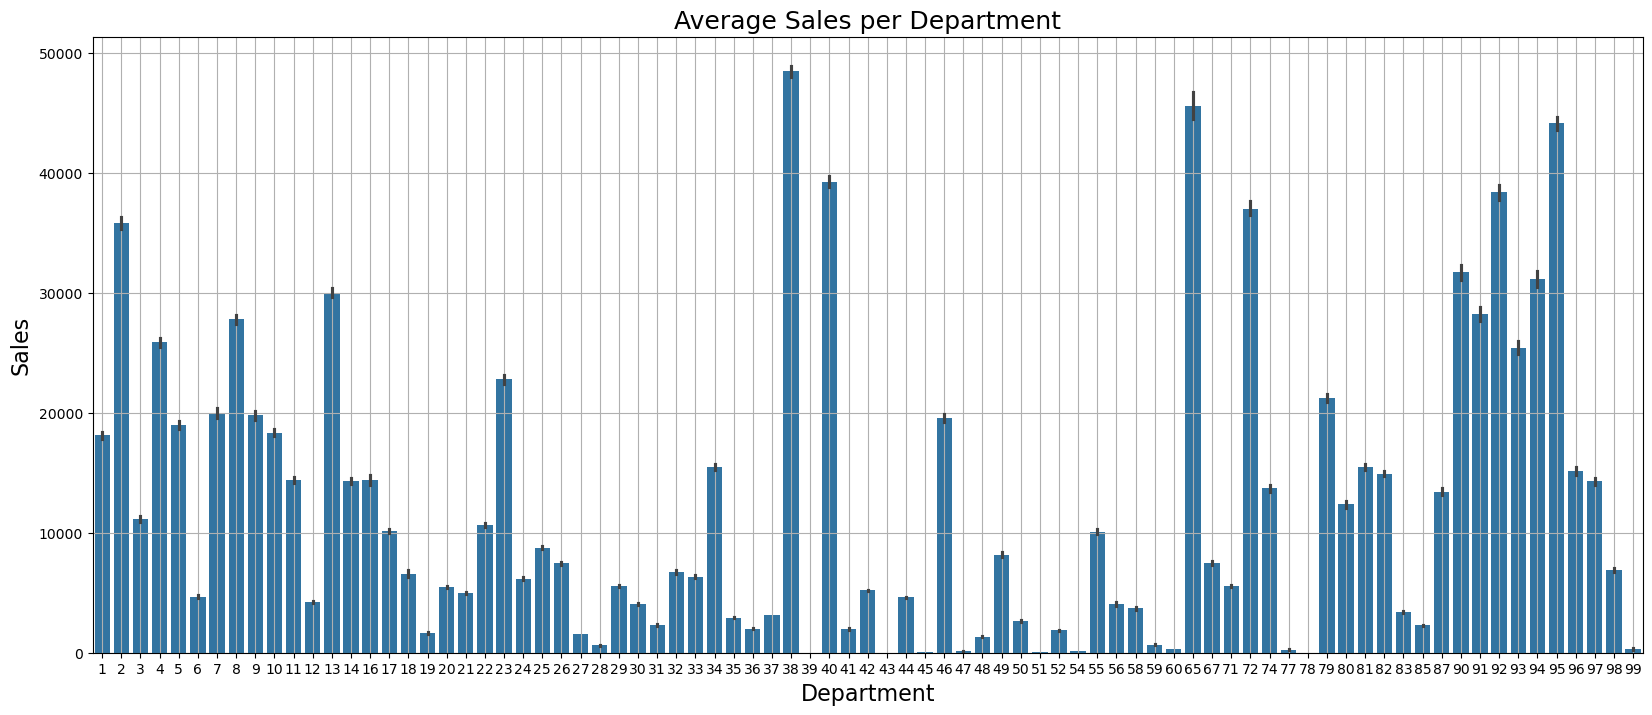

In [42]:
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.show()

**Sales Vs Temperature**

/var/folders/f7/0trt71kj04z60pww5z4_6yl00000gn/T/ipykernel_9338/1231431672.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Temperature'])


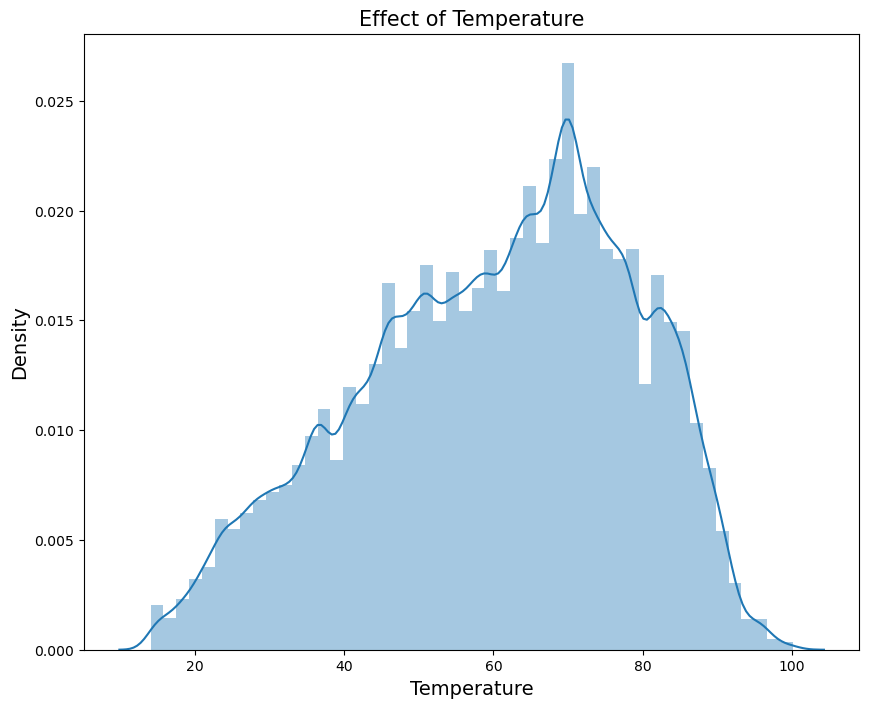

In [43]:
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

**Holiday Distribution**

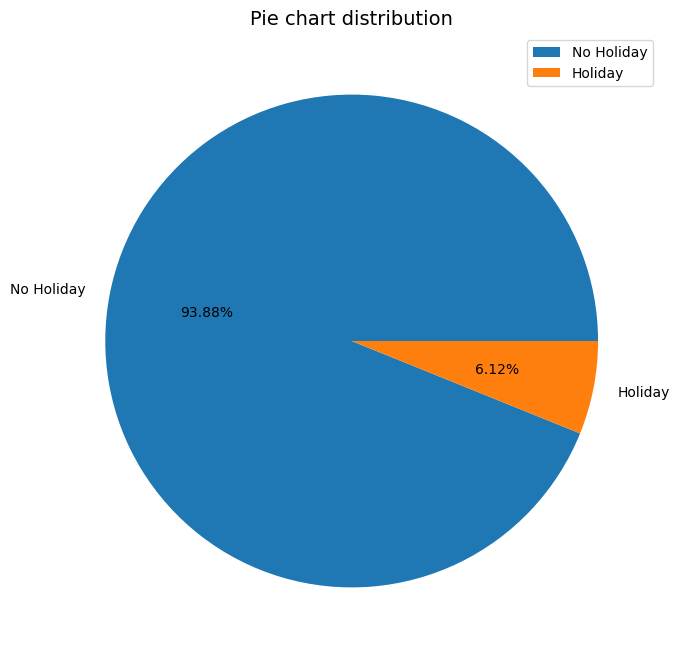

In [44]:
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()

plt.show()

#**Time Series Decompose**

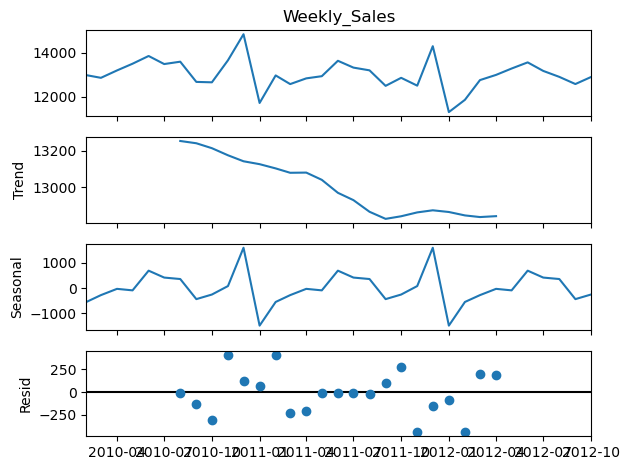

In [45]:
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
plt.show()

# **One-hot-encoding**

In [46]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()

In [47]:
data_cat.tail()

,Store,Dept,Type
Date,,,
2012-10-26,2,26,A
2012-10-26,38,23,C
2012-10-26,27,6,A
2012-10-26,36,40,A
2012-10-26,45,98,B


In [48]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [49]:
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
2010-02-05,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2010-02-05,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [50]:
data.shape

(374247, 20)

In [51]:
data = pd.concat([data, data_cat],axis=1)

In [52]:
data.shape

(374247, 149)

In [53]:
data.drop(columns=cat_col,inplace=True)

In [54]:
data.drop(columns=['Date'],inplace=True)

In [55]:
data.shape

(374247, 145)

# **Data Normalization**

In [56]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']

In [57]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [58]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,False,False,False,False,True,False,False,False,True,False
2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,False,False,False,False,False,False,False,False,True,False
2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,False,False,False,False,False,False,False,False,True,False


In [59]:
data = normalization(data.copy(),num_col)

In [60]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.342576,0.630267,0.328495,0.0501,0.840500,0.508787,0,2010,2,5,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,0.009188,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,False,False,False,False,True,False,False,False,True,False
2010-02-05,0.009537,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,False,False,False,False,False,False,False,False,True,False
2010-02-05,0.118953,0.650636,0.233627,0.0501,0.873861,0.291286,0,2010,2,5,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,0.152888,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,False,False,False,False,False,False,False,False,True,False


# **Correlation between features of dataset**

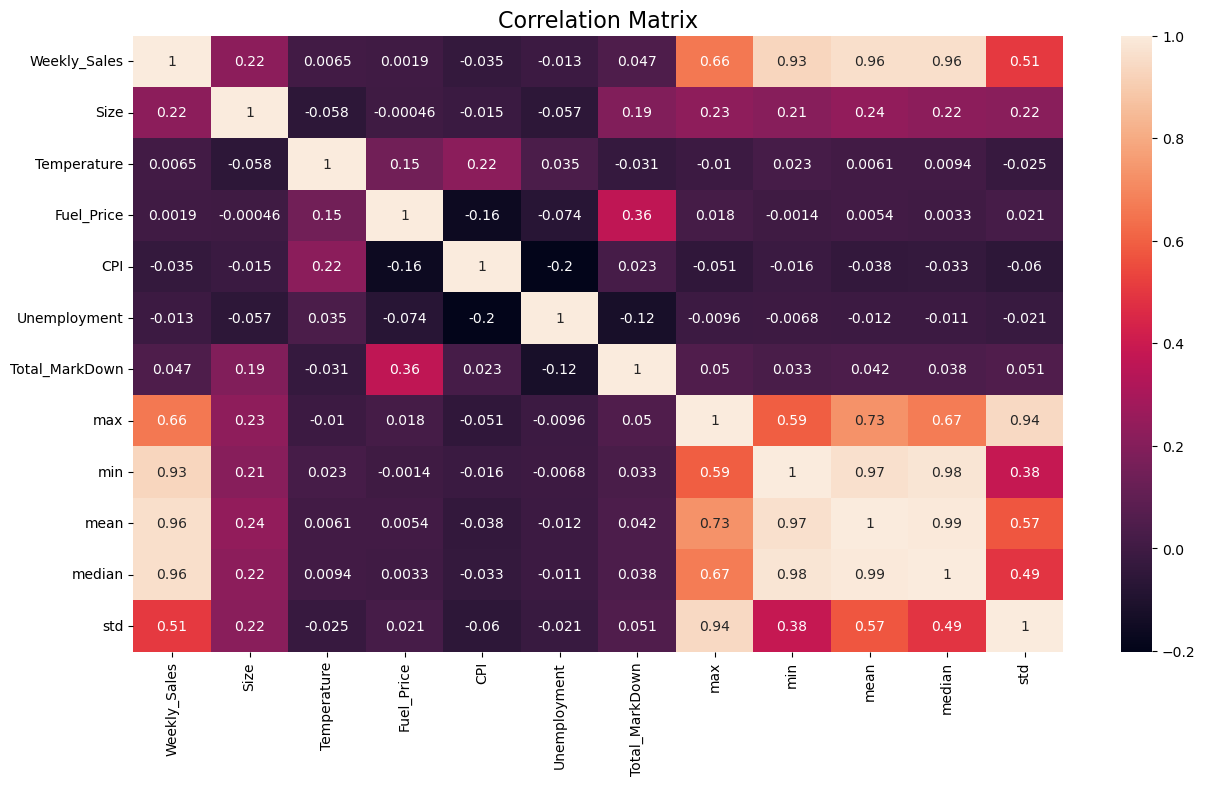

In [61]:
plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()

# **Recursive Feature Elimination**

In [62]:
feature_col = data.columns.difference(['Weekly_Sales'])
feature_col

Index(['CPI', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18',
       ...
       'Type_B', 'Type_C', 'Unemployment', 'Week', 'Year', 'max', 'mean',
       'median', 'min', 'std'],
      dtype='object', length=144)

In [63]:

# param_grid={'n_estimators':np.arange(10,25)}
# tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=5)
# tree.fit(data_train[feature_col],data_train['Weekly_Sales'])


In [64]:
# tree.best_params_

In [65]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(data[feature_col], data['Weekly_Sales'])

/Users/leonard/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,n_estimators,23
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [66]:
pkl_filename = "../models/feature_elim_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(radm_clf, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


In [67]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(data[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data[feature_col].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,mean,6.030235e-01
1,2,median,3.248131e-01
2,3,Week,1.971745e-02
3,4,Temperature,8.812799e-03
4,5,max,6.006778e-03
...,...,...,...
139,140,Dept_51,2.461151e-10
140,141,Dept_45,1.728287e-10
141,142,Dept_78,3.599711e-12
142,143,Dept_39,2.020223e-14


In [68]:
x=feature_rank.loc[0:22,['feature']]
x=x['feature'].tolist()
print(x)

['mean', 'median', 'Week', 'Temperature', 'max', 'CPI', 'Fuel_Price', 'min', 'Unemployment', 'std', 'Month', 'Total_MarkDown', 'Dept_16', 'Dept_18', 'IsHoliday', 'Dept_3', 'Size', 'Year', 'Dept_1', 'Dept_11', 'Dept_9', 'Dept_5', 'Dept_56']


In [69]:
X = data[x]
Y = data['Weekly_Sales']

In [70]:
data = pd.concat([X,Y],axis=1)

In [71]:
data

,mean,median,Week,Temperature,max,CPI,Fuel_Price,min,Unemployment,std,...,IsHoliday,Dept_3,Size,Year,Dept_1,Dept_11,Dept_9,Dept_5,Dept_56,Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.208157,0.173215,5,0.328495,0.088635,0.840500,0.050100,0.253530,0.508787,0.138276,...,0,False,0.630267,2010,True,False,False,False,False,0.342576
2010-02-05,0.004499,0.004767,5,0.278565,0.001180,0.875680,0.050100,0.064648,0.305248,0.004083,...,0,False,0.492338,2010,False,False,False,False,False,0.009188
2010-02-05,0.009135,0.008968,5,0.278565,0.003866,0.875680,0.050100,0.066212,0.305248,0.004314,...,0,False,0.492338,2010,False,False,False,False,False,0.009537
2010-02-05,0.085594,0.086290,5,0.233627,0.018453,0.873861,0.050100,0.161046,0.291286,0.010611,...,0,False,0.650636,2010,False,False,False,False,False,0.118953
2010-02-05,0.080242,0.071542,5,0.278565,0.044887,0.875680,0.050100,0.126993,0.305248,0.054362,...,0,False,0.492338,2010,False,False,False,False,False,0.152888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0.087055,0.082590,43,0.647585,0.030286,0.958935,0.518036,0.119050,0.275758,0.039642,...,0,False,0.906277,2012,False,False,False,False,False,0.127259
2012-10-26,0.001419,0.001617,43,0.602996,0.000446,0.050698,0.916333,0.064822,0.760713,0.000478,...,0,False,0.026063,2012,False,False,False,False,False,0.000730
2012-10-26,0.072181,0.064375,43,0.522178,0.063107,0.165055,0.801102,0.097548,0.496028,0.072670,...,0,False,0.916437,2012,False,False,False,False,False,0.073391


In [72]:
data.to_csv('../data/final_data.csv')

# **Data Splitted into Training, Validation, Test**

In [73]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

# **Linear Regression Model**

In [75]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [76]:
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)

Linear Regressor Accuracy -  92.28079698115758


In [77]:
y_pred = lr.predict(X_test)

In [78]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.030057714921514322
MSE 0.0034851431916206577
RMSE 0.059035101351828455
R2 0.9228079866096734


In [79]:
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.132555
2010-07-09,0.364278,0.280242
2011-07-01,0.005003,0.026085
2012-01-06,0.015856,0.015369
2011-08-26,0.000318,0.002072
...,...,...
2011-01-28,0.169068,0.236392
2010-08-20,0.252860,0.235591
2010-11-26,0.265617,0.321839


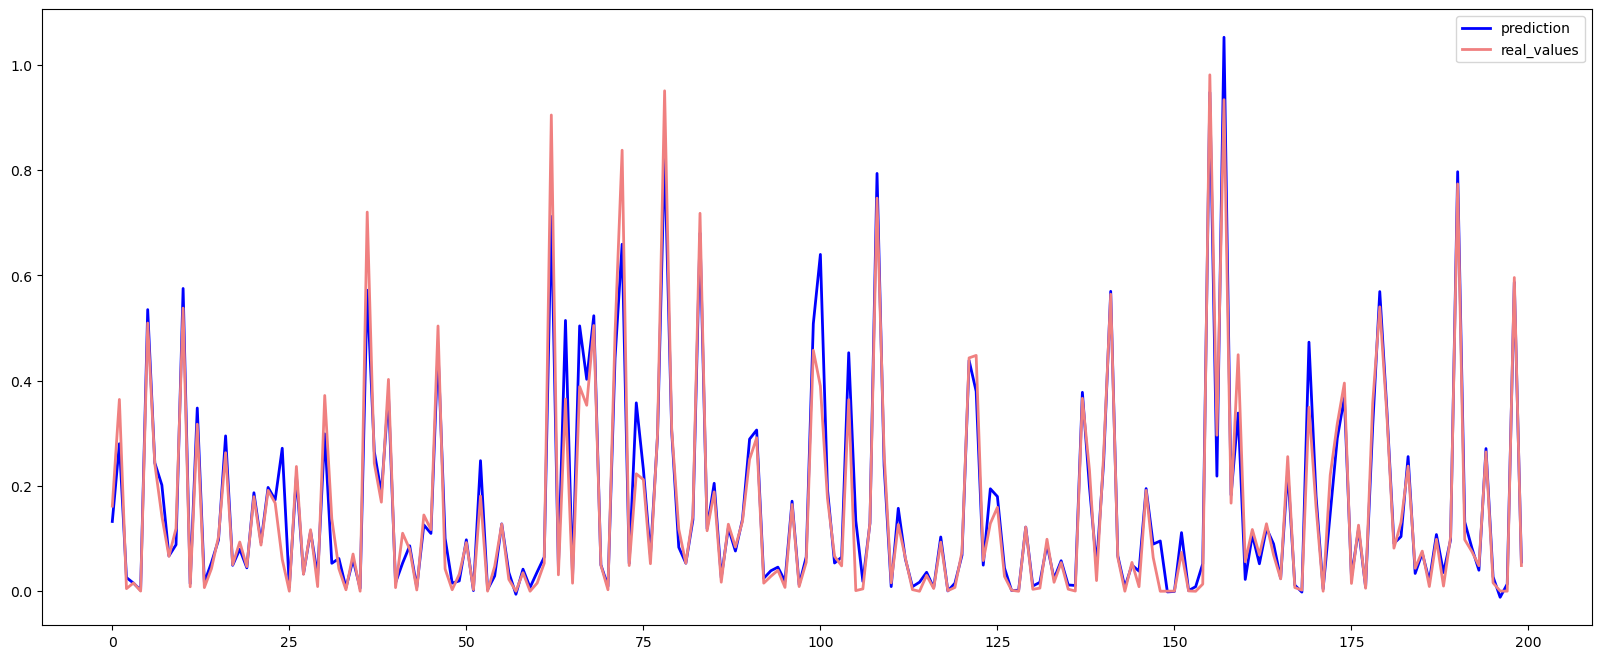

In [80]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")

plt.show()

**Saving trained model**

In [81]:
pkl_filename = "../models/linear_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lr, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


# **Random Forest Regressor Model**

In [82]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [83]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  97.89696133257011


In [84]:
y_pred = rf.predict(X_test)

In [85]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.015500383669979067
MSE 0.0009495009880705761
RMSE 0.030813973909098062
R2 0.9789697858030445


In [86]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.128826
2010-07-09,0.364278,0.333332
2011-07-01,0.005003,0.014512
2012-01-06,0.015856,0.020348
2011-08-26,0.000318,0.000550
...,...,...
2011-01-28,0.169068,0.174441
2010-08-20,0.252860,0.262106
2010-11-26,0.265617,0.373542


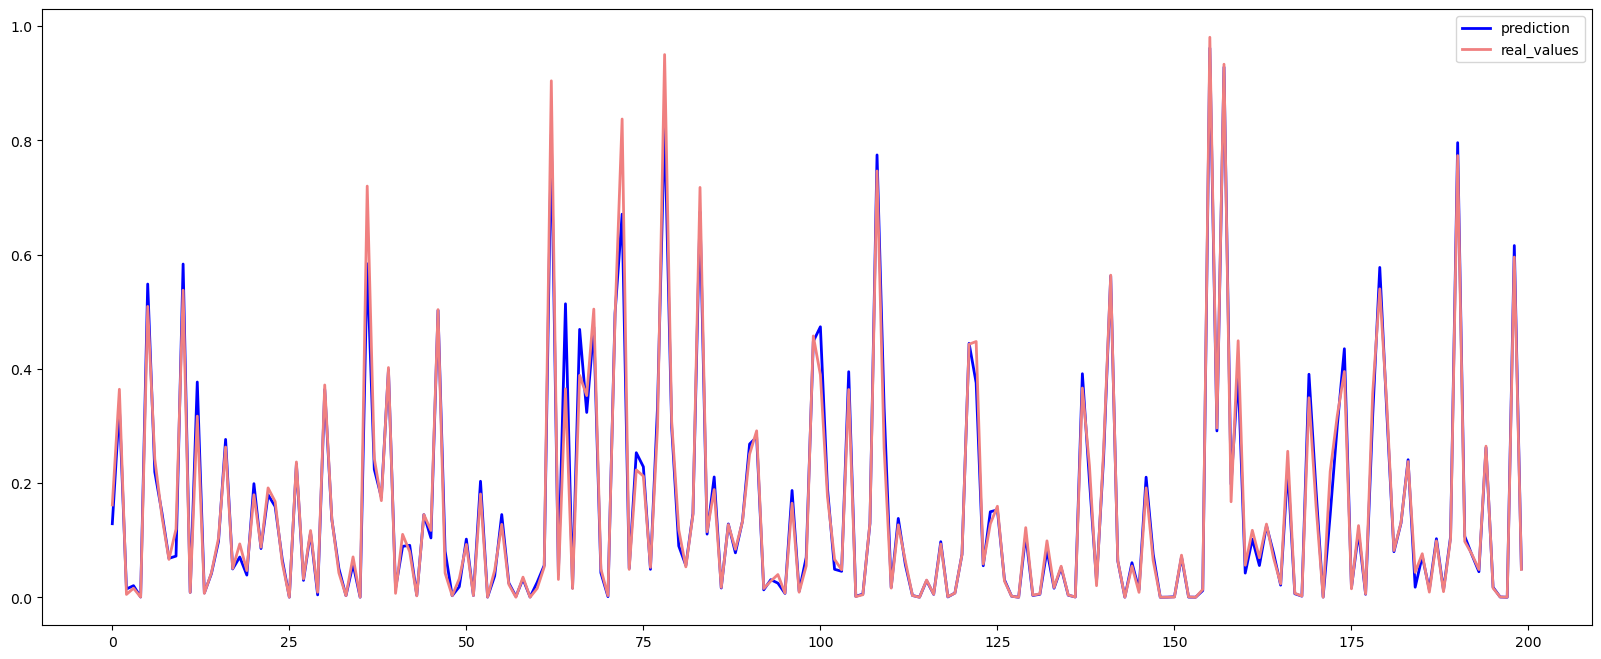

In [87]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

**Saving trained model**

In [88]:
pkl_filename = "../models/randomforest_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


# **Custom Deep Learning Neural Network**

In [89]:
def create_model():
  model = Sequential()
  model.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer='normal',activation='relu'))
  model.add(Dense(32, kernel_initializer='normal'))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(loss='mean_absolute_error', optimizer='adam')
  return model

In [90]:
estimator_model = KerasRegressor(
    model=create_model,
    verbose=1,
    epochs=100,
    batch_size=5000
)

In [91]:
history = estimator_model.fit(X_train, y_train, validation_split=0.1, epochs=500, batch_size=5000)

Epoch 1/500


/Users/leonard/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6037 - val_loss: 0.6353
Epoch 2/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3796 - val_loss: 0.4277
Epoch 3/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3155 - val_loss: 0.1406
Epoch 4/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2161 - val_loss: 0.2019
Epoch 5/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1621 - val_loss: 0.1827
Epoch 6/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1735 - val_loss: 0.1397
Epoch 7/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1655 - val_loss: 0.1763
Epoch 8/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1687 - val_loss: 0.2249
Epoch 9/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1544 - val_loss: 0.1159
Epoch 10/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1270 - val_loss: 0.1512
Epoch 11/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3058 - val_loss: 0.1129
Epoch 12/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1521 - val_lo

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0647 - val_loss: 0.0465
Epoch 70/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0805 - val_loss: 0.1256
Epoch 71/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0591 - val_loss: 0.0727
Epoch 72/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0571 - val_loss: 0.0494
Epoch 73/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0633 - val_loss: 0.0974
Epoch 74/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0838 - val_loss: 0.0600
Epoch 75/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0723 - val_loss: 0.0734
Epoch 76/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0706 - val_loss: 0.0959
Epoch 77/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0702 - val_loss: 0.0421
Epoch 78/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0682 - val_loss: 0.0768
Epoch 79/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0675 - val_loss: 0.0481
Epoch 80/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0660 

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0320 - val_loss: 0.0338
Epoch 138/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0439 - val_loss: 0.0334
Epoch 139/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0531 - val_loss: 0.0619
Epoch 140/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0511 - val_loss: 0.0350
Epoch 141/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0494 - val_loss: 0.0564
Epoch 142/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0479 - val_loss: 0.0423
Epoch 143/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0385 - val_loss: 0.0432
Epoch 144/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0436 - val_loss: 0.0385
Epoch 145/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0471 - val_loss: 0.0522
Epoch 146/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0421 - val_loss: 0.0389
Epoch 147/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0331 - val_loss: 0.0309
Epoch 148/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0314 - val_loss: 0.0303
Epoch 205/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0315 - val_loss: 0.0292
Epoch 206/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0297 - val_loss: 0.0307
Epoch 207/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0311 - val_loss: 0.0297
Epoch 208/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0309 - val_loss: 0.0296
Epoch 209/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0357 - val_loss: 0.0310
Epoch 210/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0455 - val_loss: 0.0416
Epoch 211/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0425 - val_loss: 0.0354
Epoch 212/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0385 - val_loss: 0.0424
Epoch 213/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0320 - val_loss: 0.0317
Epoch 214/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0309 - val_loss: 0.0331
Epoch 215/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0301 - val_loss: 0.0334
Epoch 272/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0316 - val_loss: 0.0308
Epoch 273/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0315 - val_loss: 0.0326
Epoch 274/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0306 - val_loss: 0.0292
Epoch 275/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0298 - val_loss: 0.0355
Epoch 276/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0303 - val_loss: 0.0407
Epoch 277/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0324 - val_loss: 0.0349
Epoch 278/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0315 - val_loss: 0.0357
Epoch 279/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0306 - val_loss: 0.0313
Epoch 280/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0298 - val_loss: 0.0290
Epoch 281/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0308 - val_loss: 0.0292
Epoch 282/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0299 - val_loss: 0.0322
Epoch 339/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0301 - val_loss: 0.0336
Epoch 340/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0302 - val_loss: 0.0289
Epoch 341/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0301 - val_loss: 0.0323
Epoch 342/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0301 - val_loss: 0.0293
Epoch 343/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0297 - val_loss: 0.0299
Epoch 344/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0309 - val_loss: 0.0287
Epoch 345/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0301 - val_loss: 0.0300
Epoch 346/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0303 - val_loss: 0.0294
Epoch 347/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0298 - val_loss: 0.0290
Epoch 348/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0305 - val_loss: 0.0297
Epoch 349/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0290 - val_loss: 0.0317
Epoch 406/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0298 - val_loss: 0.0299
Epoch 407/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0296 - val_loss: 0.0309
Epoch 408/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0295 - val_loss: 0.0285
Epoch 409/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0295 - val_loss: 0.0286
Epoch 410/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0296 - val_loss: 0.0304
Epoch 411/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0300 - val_loss: 0.0285
Epoch 412/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0297 - val_loss: 0.0333
Epoch 413/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0301 - val_loss: 0.0292
Epoch 414/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0298 - val_loss: 0.0306
Epoch 415/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0297 - val_loss: 0.0283
Epoch 416/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0290 - val_loss: 0.0282
Epoch 473/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0299 - val_loss: 0.0291
Epoch 474/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0288 - val_loss: 0.0282
Epoch 475/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0287 - val_loss: 0.0285
Epoch 476/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0294 - val_loss: 0.0321
Epoch 477/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0293 - val_loss: 0.0294
Epoch 478/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0287 - val_loss: 0.0281
Epoch 479/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0289 - val_loss: 0.0310
Epoch 480/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0291 - val_loss: 0.0291
Epoch 481/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0287 - val_loss: 0.0280
Epoch 482/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0287 - val_loss: 0.0297
Epoch 483/500
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

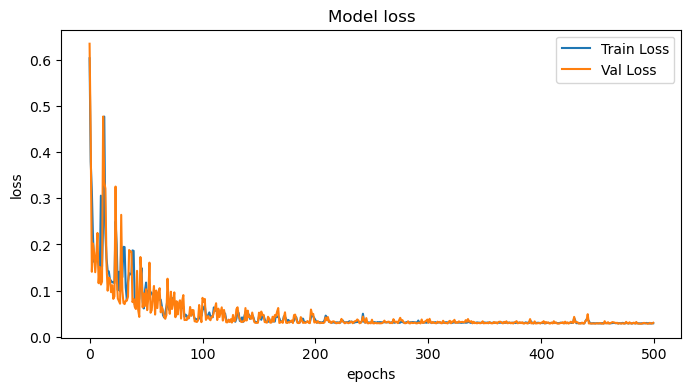

In [92]:
if hasattr(estimator_model, "history_"):
    h = estimator_model.history_
    if hasattr(h, "history"):   
        h = h.history          

    train_loss = h.get("loss", [])
    val_loss   = h.get("val_loss", [])

    import matplotlib.pyplot as plt
    plt.figure(figsize=(8,4))
    plt.plot(train_loss, label="Train Loss")
    if len(val_loss) > 0:
        plt.plot(val_loss, label="Val Loss")
    plt.title("Model loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend(loc="upper right")
    plt.show()
else:
    print("No history_ found on estimator_model")

In [93]:
y_pred = estimator_model.predict(X_test)
dnn_acc = metrics.r2_score(y_pred, y_test)*100
print("Deep Neural Network accuracy - ",dnn_acc)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Deep Neural Network accuracy -  90.79678597999715


In [94]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.0298356539817672
MSE 0.003729093739298796
RMSE 0.06106630608853622
R2 0.9239171957405612


In [95]:
dnn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dnn_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.104671
2010-07-09,0.364278,0.265413
2011-07-01,0.005003,0.010926
2012-01-06,0.015856,0.012469
2011-08-26,0.000318,-0.004408
...,...,...
2011-01-28,0.169068,0.217773
2010-08-20,0.252860,0.225269
2010-11-26,0.265617,0.264030


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


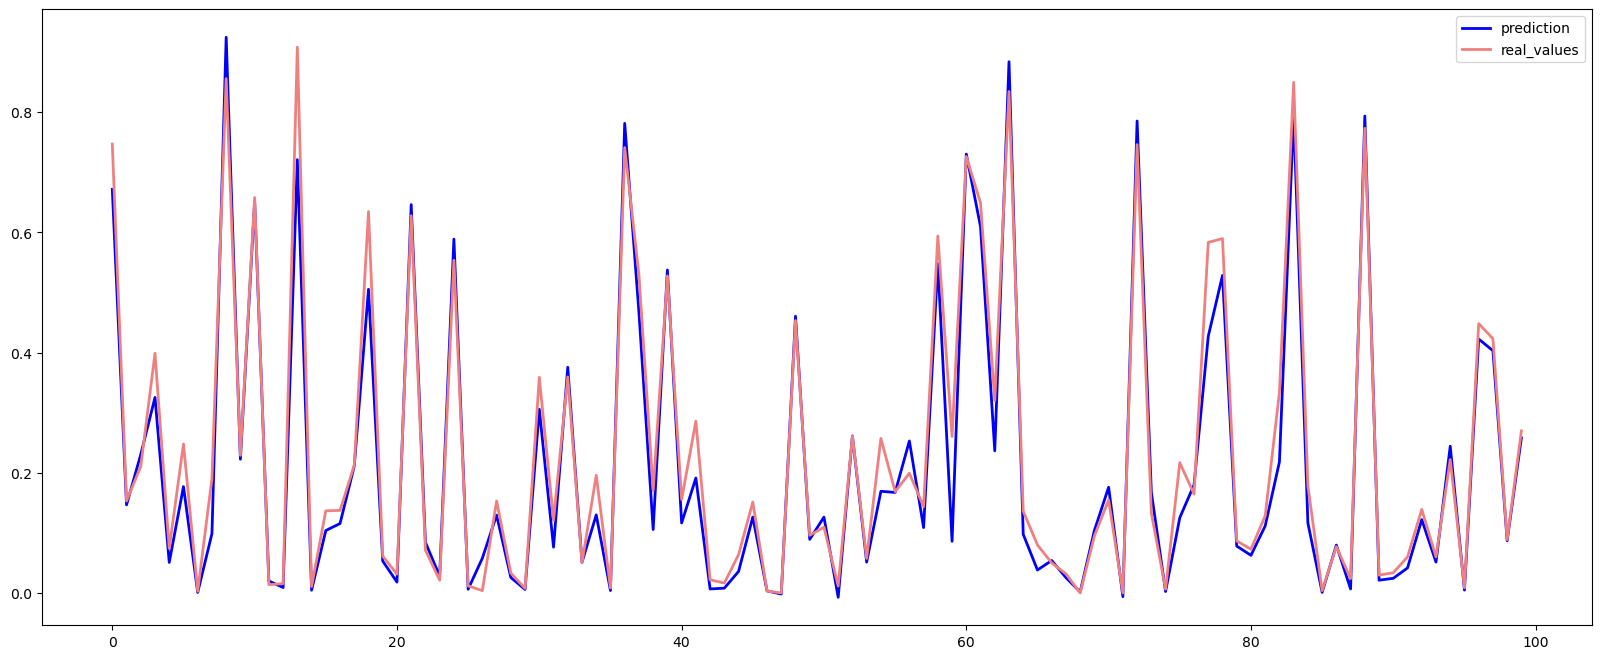

In [96]:
plt.figure(figsize=(20,8))
plt.plot(estimator_model.predict(X_test[200:300]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:300].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")

In [97]:
import os
filepath = '../models/dnn_regressor.json'
weightspath = '../models/dnn_regressor.weights.h5'
os.makedirs(os.path.dirname(filepath), exist_ok=True)
model = estimator_model.model_   

model_json = model.to_json()
with open(filepath, "w") as json_file:
    json_file.write(model_json)

model.save_weights(weightspath)

print("Model architecture & weights saved:")
print(f"  - JSON: {filepath}")
print(f"  - H5 weights: {weightspath}")


Model architecture & weights saved:
  - JSON: ../models/dnn_regressor.json
  - H5 weights: ../models/dnn_regressor.weights.h5


In [98]:
from keras.models import model_from_json

# Load kiến trúc
with open(filepath, "r") as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

# Load trọng số
loaded_model.load_weights(weightspath)
print("Loaded model from disk")

loaded_model.compile(loss='mean_absolute_error', optimizer='adam')

# Dự đoán
y_pred = loaded_model.predict(X_test)
dnn_acc = metrics.r2_score(y_pred, y_test)*100
print("Deep Neural Network accuracy - ",dnn_acc)

Loaded model from disk
2340/2340 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step
Deep Neural Network accuracy -  90.79678597999715


# **Comparing Models**

In [100]:
acc = {'model':['lr_acc','rf_acc','dnn_acc'],'accuracy':[lr_acc,rf_acc,dnn_acc]}

In [101]:
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,lr_acc,92.280797
1,rf_acc,97.896961
2,dnn_acc,90.796786


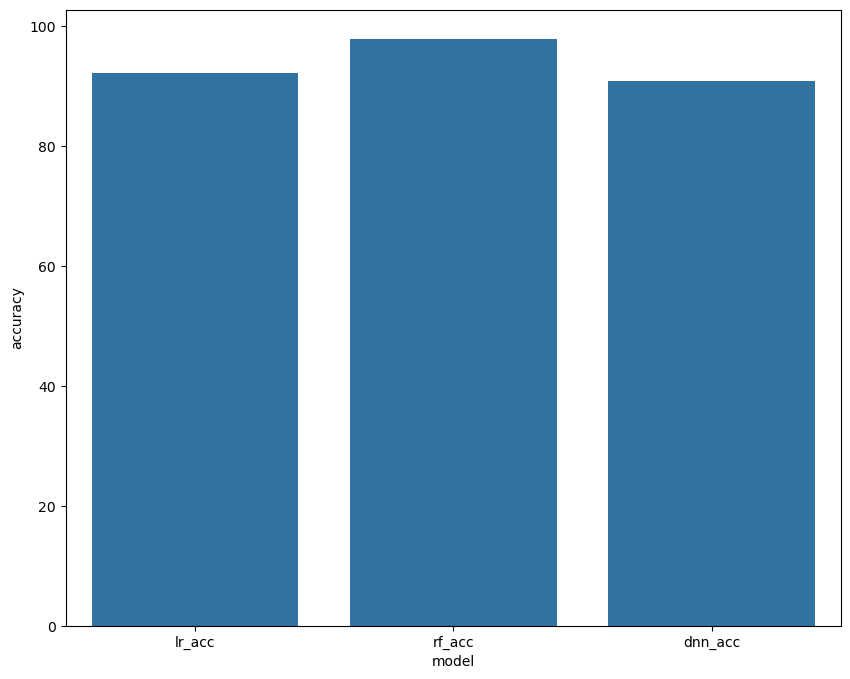

In [102]:
plt.figure(figsize=(10,8))
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.show()